In [2]:
##Import relevant libraies 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
##Loading the data

raw_data = pd.read_csv("C:/Users/Administrator/Downloads/Real-life example.csv")

In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
##Dropping columns that are not relevant

data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
##Checking for null values

data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


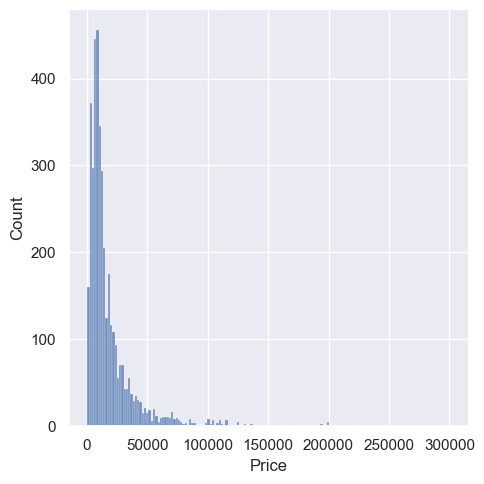

In [10]:
sns.displot(data_no_mv['Price'])

Price having an exponential distribution, which could be due to outliers. Cannot be fixed directly into the model as it will skew regression line. Solution would be to take out the outliers using quantile method. Data will be fine as long as it not >5% of dataset taken out.

In [11]:
quant = data_no_mv['Price'].quantile(0.99)
data_new = data_no_mv[data_no_mv['Price']<quant]
data_new.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


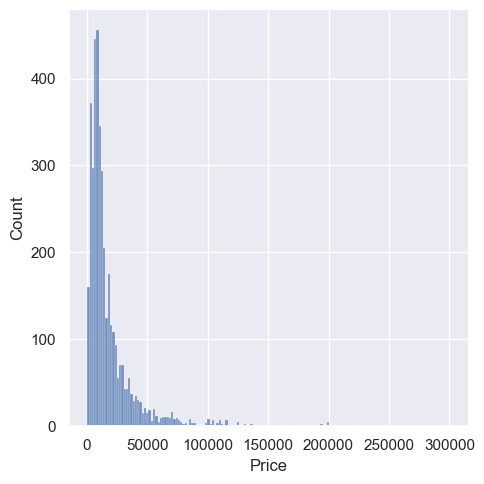

In [12]:
sns.displot(data_no_mv['Price'])

Still exponentially distributed but with lesser outliers so this should fly. Checking the data summary, I can see that both mileage and engine have similar issues which I would fix using same method as Price.

In [13]:
quant = data_new['Mileage'].quantile(0.99)
data_new_2 = data_new[data_new['Mileage']<quant]
data_new_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [14]:
data_new_3 = data_new_2[data_new_2['EngineV']<6.5]
data_new_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [15]:
quant = data_new_3['Year'].quantile(0.01)
data_new_4 = data_new_3[data_new_3['Year']>quant]
data_new_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [16]:
data_cleaned = data_new_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


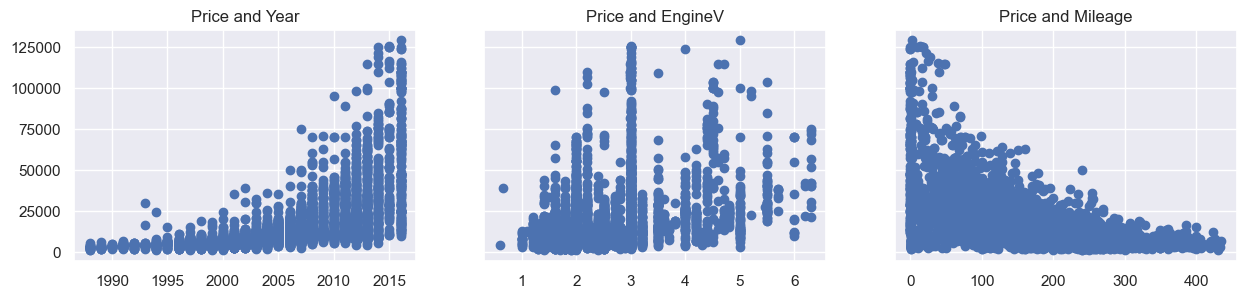

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

From the plot, it does not look like these values can be fixed in a regression model. This is where taking the log of price might come in since price is exponentially disrtibuted.

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned
            

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


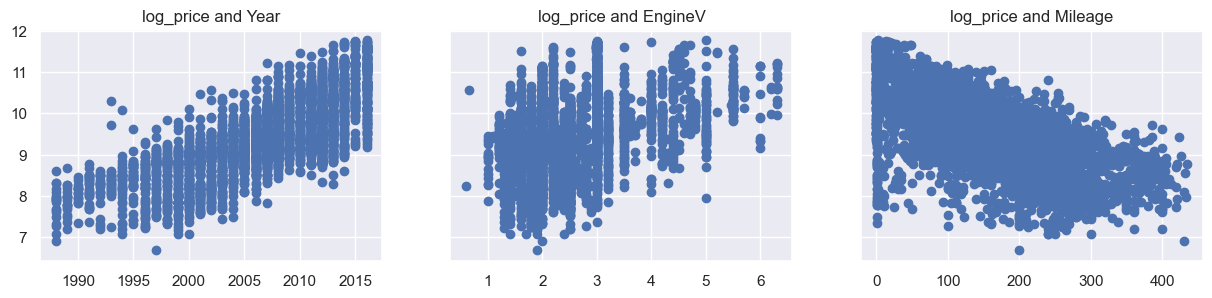

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

There is a linear pattern now. I will have to drop the original Price data from the dataset.

In [20]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

Checking for Multicolinearity

In [21]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [23]:
##Using statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Year has a VIF > 10 which means I will ahave to drop it. VIF < 5 is considered safe but due to how imperfect data is, capping it at 5 seems to conservative, so maybe VIF <10 is fair.

In [24]:
data_no_multicolinearity = data_cleaned.drop(['Year'],axis=1)

Create dummy Variables for catergorical data

In [25]:
##Created using Pandas

data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first=True).astype(int)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen']].astype(int)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,1.0,Brand_BMW
1,1.0,Brand_Mercedes-Benz
2,1.0,Brand_Mitsubishi
3,1.0,Brand_Renault
4,1.0,Brand_Toyota
5,1.0,Brand_Volkswagen


In [27]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [28]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [29]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8,427,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [30]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [34]:
from sklearn.preprocessing import StandardScaler
import numpy as np

##Separate target variable
targets = data_preprocessed['log_price']

## Separate inputs into continuous and categorical variables
continuous = data_preprocessed[['Mileage', 'EngineV']]

##Include all dummy (categorical) columns here:
categorical = data_preprocessed[['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault','Brand_Toyota', 'Brand_Volkswagen','Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van', 
    'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]

##Scale only the continuous variables
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(continuous)


In [55]:
##Combine scaled continuous + categorical dummies

import numpy as np
inputs_scaled = np.concatenate((continuous_scaled, categorical.values), axis=1)
inputs_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)


In [56]:
inputs_scaled

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.217908,-0.097266,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2.786602,-0.097266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.065003,2.781260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.830963,1.821751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.423992,-0.097266,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.025700,-0.097266,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3863,-1.312919,-1.056775,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3864,-1.584826,0.862243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3865,-1.668490,0.862243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [57]:
##Proceed with train-test split and regression

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [58]:
##Create the regression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
y_hat = reg.predict(x_train)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2:', r2_score(y_train, y_hat))
print('MSE:', mean_squared_error(y_train, y_hat))


R2: 0.6783657519465218
MSE: 0.27387702137502


In [63]:
y_hat_test = reg.predict(x_test)
print('Test R2:', r2_score(y_test, y_hat_test))
print('Test MSE:', mean_squared_error(y_test, y_hat_test))


Test R2: 0.6955154941074033
Test MSE: 0.27102138037352613


In [67]:
reg.score(x_train,y_train)

0.6783657519465218

In [68]:
reg.intercept_

np.float64(8.570365420839916)

In [69]:
reg.coef_

array([-0.45359228,  0.23050793, -0.00264213, -0.01919205, -0.56915551,
       -0.58795848, -0.1425964 , -0.20952139, -0.51722161, -0.29933257,
       -0.33571523, -0.39265176, -0.40171913, -0.324911  , -0.24609458,
       -0.31221401,  1.09153174])

In [71]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg.summary['Weights'] = reg.coef_
reg.summary
                           

,Features,Weights
0,Mileage,-0.453592
1,EngineV,0.230508
2,Brand_BMW,-0.002642
3,Brand_Mercedes-Benz,-0.019192
4,Brand_Mitsubishi,-0.569156
5,Brand_Renault,-0.587958
6,Brand_Toyota,-0.142596
7,Brand_Volkswagen,-0.209521
8,Body_hatch,-0.517222
9,Body_other,-0.299333


Testing

In [74]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()
                     

,Predictions
0,6934.097236
1,2069.703803
2,4655.892731
3,4274.111802
4,6317.699309


In [75]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,6934.097236,NaN
1,2069.703803,2980.957987
2,4655.892731,NaN
3,4274.111802,NaN
4,6317.699309,NaN
...,...,...
769,17139.816424,2980.957987
770,6648.468170,NaN
771,8651.763632,NaN
772,17342.848162,NaN


In [76]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7
1    7
2    7
3    8
4    9
Name: log_price, dtype: int64

In [77]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,6934.097236,1096.633158
1,2069.703803,1096.633158
2,4655.892731,1096.633158
3,4274.111802,2980.957987
4,6317.699309,8103.083928
...,...,...
769,17139.816424,22026.465795
770,6648.468170,8103.083928
771,8651.763632,8103.083928
772,17342.848162,59874.141715


In [78]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']

In [80]:
df_pf['Differences%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf
                                    

,Predictions,Targets,Residuals,Differences%
0,6934.097236,1096.633158,-5837.464077,532.307822
1,2069.703803,1096.633158,-973.070644,88.732557
2,4655.892731,1096.633158,-3559.259573,324.562462
3,4274.111802,2980.957987,-1293.153814,43.380478
4,6317.699309,8103.083928,1785.384619,22.033397
...,...,...,...,...
769,17139.816424,22026.465795,4886.649370,22.185354
770,6648.468170,8103.083928,1454.615758,17.951385
771,8651.763632,8103.083928,-548.679705,6.771245
772,17342.848162,59874.141715,42531.293553,71.034494


In [81]:
df_pf.describe()

,Predictions,Targets,Residuals,Differences%
count,774.000000,774.000000,774.000000,774.000000
mean,9741.655194,11516.118703,1774.463509,46.839138
std,7957.327616,13106.658645,8006.970143,64.130660
min,897.800282,1096.633158,-27554.713998,0.058045
25%,4427.196015,2980.957987,-1658.962876,15.469086
50%,7153.779183,8103.083928,265.606710,32.825492
75%,12605.330967,8103.083928,2686.113593,53.733120
max,49581.179793,59874.141715,42531.293553,614.843647


In [84]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Differences%'])

,Predictions,Targets,Residuals,Differences%
637,22013.68,22026.47,12.79,0.06
250,2982.93,2980.96,-1.97,0.07
420,8095.59,8103.08,7.49,0.09
18,22003.78,22026.47,22.69,0.10
205,8123.56,8103.08,-20.48,0.25
276,2988.78,2980.96,-7.83,0.26
159,8130.17,8103.08,-27.09,0.33
118,8145.07,8103.08,-41.99,0.52
705,8057.54,8103.08,45.54,0.56
359,3000.12,2980.96,-19.16,0.64


The model isn't outstanding but can be better. Prices that are way lower than the predictions could be due to factors I did not factor into the model. Example of factors that could drag the price lower than the predicted values could be accidents, damages due to careless handling by previous owners. Remember I had to remove year of production cos of correkation with mileage. This too could be another factor as older cars tend to cost lesser (except vintage cars). Mileage, while correlated with price is not enough as some older cars might have more mileage than recent ones, all depends on usage to be honest. Overall, the model explains approximately 69% of the data with minimal errors which is a good start. Access to data with more info could improve it. Although, I will still revist to explore several methods at making it better. Propably try stuff like feature selection, etc. 

I am open to ideas. I love to learn, re-learn and unlearn. Just incase anyone has any, reach me through this email:chukwumasamuel27@gmail.com